## Package Description

`bmdrc` is a python library for calculating **B**ench**m**ark **D**ose **R**esponse **C**urves for dichotomous (binary) and light photomotor (continuous converted to dichotomous) data. This 
tutorial will take users through the library using a dichotomous (binary response) example. `bmdrc` is broken up into five modules 


![five_modules](../bmdrc.png): 


1. *Input Data Module:* Import data into the python library

2. *Pre-Processing Module:* Combine and remove endpoints as needed

3. *Filtering Modules:* Apply the EPA recommendations for filtering 

4. *Model Fitting Modules:* Fit EPA-recommended models to data

5. *Output Modules:* Select tables to output as csvs. View plots in a HTML report.

First, install the package from pip using: 

`pip install bmdrc`

Or from github using: 

`pip install git+https://github.com/PNNL-CompBio/bmdrc`

## Data Types Description

For datasets with plates and wells, use the `BinaryClass` object as it contains specific pre-processing and filtering functions that pertain to plates and well. Each value should be 0, 1, or NA, and `bmdrc` will calculate the response column. If your data does not contain plates and wells, use the `SimplifiedClass` object which only requires chemical, endpoint, concentration, and response information. The response must be between 0 and 1. If your data is light photomotor response use the `LPRClass` object. The continuous data will be transformed to dichotomous.

In [1]:
# Load local libraries
import bmdrc 
import pandas as pd

## Module 1: Input Data Module 

The first step to using the bmdrc python library is to properly format the data. For dichotmous data without plate or well information, use the `SimplifiedClass` object which can be imported using `from bmdrc.SimplifiedClass import SimplifiedClass`. Next, read the data as a pandas dataframe. The data must be in long format. You will need four columns - the chemical, the endpoint, the concentration, and the response value which must range between 0 and 1. Remove NAs before making the `SimplifiedClass` object.

In [2]:
from bmdrc.SimplifiedClass import SimplifiedClass

res_only = SimplifiedClass(
    df = pd.read_table("../data/ToxExample_Long.txt"), # Input is a pandas DataFrame
    chemical = "chemical.id", # The name of the chemical column 
    endpoint = "endpoint", # The name of the column with endpoints
    concentration = "concentration", # The name of the concentration column
    response = "response" # The name of the column with response value ranging from 0 to 1
)

## Module 2: Pre-Processing Modules

These modules allow for the creation of new endpoints from existing ones, the removal of wells with specific variables (like "DNC" which stands for "Do Not Count"), and the removal of endpoints that shouldn't be modeled. Here, only removing endpoints is applicable, as new endpoints cannot be created since they depend on the absence/presence (0/1) *and* wells cannot be set to NA as there is no well information.

#### Remove Endpoints

In [3]:
res_only.remove_endpoints(endpoint_name = "DNC")
res_only.df["endpoint"].unique()

array(['Tox21_202992', 'Endpoint1', 'Endpoint2'], dtype=object)

## Module 3: Filtering Modules

The EPA has recommendations for filters and filter values to minimize potential errors when calculating benchmark dose response curves. Filter parameters and filtered data are tracked in attributes for report-building purposes.

**Negative Control Filter:** Not used, as the assumption is that plates with unusually high responses should be removed. Here, there is no plate information. 

#### Minimum Concentration Filter
Another recommendation from the EPA is that any endpoints with less than 3 measurements for a specific endpoint should be tossed entirely. The default is 3. 

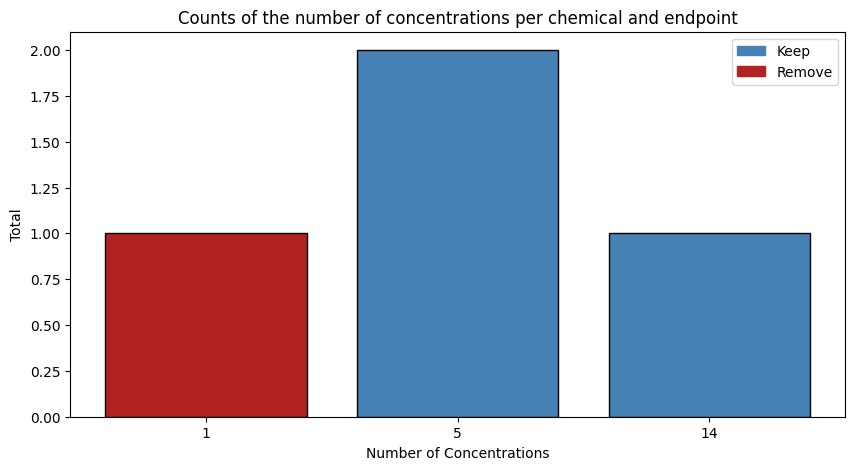

In [4]:
# Set the percentage and build the diagnostic plot, but don't actually apply the filter. 
res_only.filter_min_concentration(count = 3, apply = False, diagnostic_plot = True)

In [5]:
res_only.filter_min_concentration_df

,NumConc,Count,Filter
0,14,1,Keep
1,5,2,Keep
2,1,1,Remove


In [6]:
# Apply the filter with defaults
res_only.filter_min_concentration(apply = True)

### Correlation Score Filter

To fit a curve, we expect the response to increase with the dose. The EPA recommends calculated a spearman correlation, and removing endpoints that fall below a correlation score of 0.2. This also saves time on fitting models, as these endpoints are not considred in the modeling step

In [7]:
# View filter 
res_only.filter_correlation_score(score = 0.2, diagnostic_plot = True, apply = False)

KeyError: "['bmdrc.num.nonna', 'bmdrc.num.affected'] not in index"

In [8]:
res_only.plate_groups

,chemical.id,concentration,plate,endpoint,response,bmdrc.Plate.ID,bmdrc.Endpoint.ID,bmdrc.filter,bmdrc.filter.reason
0,DTXSID7020182,0.000,NoPlate,Tox21_202992,0.0247,DTXSID7020182 NoPlate Tox21_202992,DTXSID7020182 Tox21_202992,Keep,
1,DTXSID7020182,0.000,NoPlate,Tox21_202992,0.0004,DTXSID7020182 NoPlate Tox21_202992,DTXSID7020182 Tox21_202992,Keep,
2,DTXSID7020182,0.000,NoPlate,Tox21_202992,0.0097,DTXSID7020182 NoPlate Tox21_202992,DTXSID7020182 Tox21_202992,Keep,
3,DTXSID7020182,0.003,NoPlate,Tox21_202992,0.0157,DTXSID7020182 NoPlate Tox21_202992,DTXSID7020182 Tox21_202992,Keep,
4,DTXSID7020182,0.003,NoPlate,Tox21_202992,0.0000,DTXSID7020182 NoPlate Tox21_202992,DTXSID7020182 Tox21_202992,Keep,
5,DTXSID7020182,0.003,NoPlate,Tox21_202992,0.0000,DTXSID7020182 NoPlate Tox21_202992,DTXSID7020182 Tox21_202992,Keep,
6,DTXSID7020182,0.007,NoPlate,Tox21_202992,0.0400,DTXSID7020182 NoPlate Tox21_202992,DTXSID7020182 Tox21_202992,Keep,
7,DTXSID7020182,0.007,NoPlate,Tox21_202992,0.0423,DTXSID7020182 NoPlate Tox21_202992,DTXSID7020182 Tox21_202992,Keep,
8,DTXSID7020182,0.007,NoPlate,Tox21_202992,0.0000,DTXSID7020182 NoPlate Tox21_202992,DTXSID7020182 Tox21_202992,Keep,
9,DTXSID7020182,0.010,NoPlate,Tox21_202992,0.0606,DTXSID7020182 NoPlate Tox21_202992,DTXSID7020182 Tox21_202992,Keep,
